<a href="https://colab.research.google.com/github/Kushagra-1071/Portfolio_Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing 100 companies data.


Getting ticker data from yahoo finance for the data

LSTM Approach

In [19]:
#importing Libraries
import yfinance as yf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from numpy import array
import numpy as np
from scipy.optimize import minimize

In [17]:
#Getting Company data for Nifty 50 stocks
company_tickers = ['ADANIPORTS.NS','ADANIENT.NS','APOLLOHOSP.NS','AXISBANK.NS','ASIANPAINT.NS','BAJAJFINSV.NS','BAJAJ-AUTO.NS','BAJFINANCE.NS','BRITANNIA.NS','BHARTIARTL.NS','BPCL.NS','CIPLA.NS','COALINDIA.NS','DRREDDY.NS','DIVISLAB.NS','EICHERMOT.NS','GRASIM.NS','HINDALCO.NS','HDFCBANK.NS','HDFCLIFE.NS','HCLTECH.NS','HINDUNILVR.NS','HEROMOTOCO.NS','ICICIBANK.NS','ITC.NS','INFY.NS','INDUSINDBK.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS','LTIM.NS','M&M.NS','MARUTI.NS','NESTLEIND.NS','ONGC.NS','NTPC.NS','POWERGRID.NS','RELIANCE.NS','SBIN.NS','SBILIFE.NS','SUNPHARMA.NS','TATASTEEL.NS','TATACONSUM.NS','TATAMOTORS.NS','TCS.NS','TECHM.NS','TITAN.NS','UPL.NS','ULTRACEMCO.NS','WIPRO.NS']
stock_data = yf.download(company_tickers, period='5y')

[*********************100%%**********************]  50 of 50 completed
              Adj Close                                            \
            ADANIENT.NS ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS   
Date                                                                
2018-11-02   173.520142    323.060760   1137.772705   1205.804932   
2018-11-05   166.504211    319.138733   1148.373413   1202.952393   
2018-11-06   162.502182    315.313538   1111.690063   1197.585815   
2018-11-07   163.786789    315.894592   1115.979614   1209.624512   
2018-11-09   164.330276    326.934418   1132.842163   1252.799316   
...                 ...           ...           ...           ...   
2023-10-27  2261.699951    782.400024   4830.200195   2955.149902   
2023-10-30  2299.100098    785.000000   4841.750000   2967.100098   
2023-10-31  2294.649902    784.750000   4819.899902   2995.699951   
2023-11-01  2217.300049    769.099976   4796.549805   2934.550049   
2023-11-02  2215.300049    774.2

In [22]:
#Train Test Split preparation for LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(stock_data[['Open', 'High', 'Low', 'Close', 'Volume']], stock_data[['Close']], test_size=0.25)

# Normalize the stock data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#Building the model
import tensorflow as tf
model = Sequential()
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=100)
# Add an LSTM layer with 128 units
X_train = np.expand_dims(X_train, axis=2)


# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
29/29 [==============================] - 2s 36ms/step - loss: 11537797.0000
Epoch 2/100
29/29 [==============================] - 1s 37ms/step - loss: 11537676.0000
Epoch 3/100
29/29 [==============================] - 1s 33ms/step - loss: 11537553.0000
Epoch 4/100
29/29 [==============================] - 1s 33ms/step - loss: 11537437.0000
Epoch 5/100
29/29 [==============================] - 1s 34ms/step - loss: 11537319.0000
Epoch 6/100
29/29 [==============================] - 1s 37ms/step - loss: 11537198.0000
Epoch 7/100
29/29 [==============================] - 1s 37ms/step - loss: 11537078.0000
Epoch 8/100
29/29 [==============================] - 1s 35ms/step - loss: 11536960.0000
Epoch 9/100
29/29 [==============================] - 1s 34ms/step - loss: 11536838.0000
Epoch 10/100
29/29 [==============================] - 1s 47ms/step - loss: 11536718.0000
Epoch 11/100
29/29 [==============================] - 1s 46ms/step - loss: 11536598.0000
Epoch 12/100
29/29 [==========

In [38]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
X_test = tf.expand_dims(X_test, axis=1)
# Predict the labels for the testing dataset
y_pred = model.predict(X_test)

2415/2415 [==============================] - 4s 1ms/step


[[-0.00811878]
 [-0.01775857]
 [-0.02797733]
 ...
 [-0.11114056]
 [-0.06652179]
 [-0.06636085]]


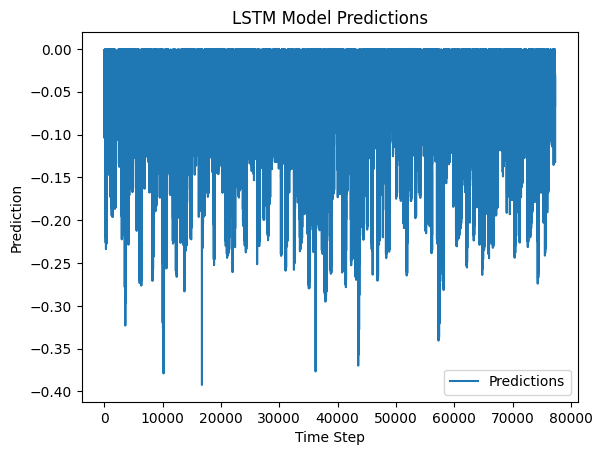

In [46]:
#Visualizing the results
import matplotlib.pyplot as plt
print(y_pred)
x_axis = np.arange(1, len(y_pred) + 1)

# Plot the predictions against the x-axis values
plt.plot(x_axis, y_pred, label='Predictions')

# Add a legend to the plot
plt.legend()

# Set the title and labels for the plot
plt.title('LSTM Model Predictions')
plt.xlabel('Time Step')
plt.ylabel('Prediction')

# Show the plot
plt.show()

In [50]:
#Markovitz Model for Allocation
from datetime import datetime,timedelta
end_date=datetime.today()
start_date=end_date-timedelta(days=5*365)
print(start_date)

#Adjusting Data Prices
adj_close_df=pd.DataFrame()
for ticker in company_tickers:
    data=yf.download(ticker, start=start_date,end=end_date)
    adj_close_df[ticker]=data['Adj Close']


2018-11-03 15:51:14.561374
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[******

In [72]:
#Calculating Optimal Weight Allocation:
from scipy.optimize import minimize
log_returns=np.log(adj_close_df/adj_close_df.shift(1))
log_returns=log_returns.dropna()
cov_matrix=log_returns.cov()*252
def standard_deviation(weights,cov_matrix):
    variance=weights.T@cov_matrix@weights
    return np.sqrt(variance)
def expected_return(weights,log_returns):
    return np.sum(log_returns.mean()*weights)*252
def sharpe_ratio(weights,log_returns,cov_matrix,risk_free_rate):
    return ((expected_return(weights,log_returns)-risk_free_rate)/standard_deviation(weights,cov_matrix))
risk_free_rate = .02

def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for _ in range(len(company_tickers))]
initial_weights = np.array([1/len(company_tickers)]*len(company_tickers))

optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(company_tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
ADANIPORTS.NS: 0.0000
ADANIENT.NS: 0.1245
APOLLOHOSP.NS: 0.0919
AXISBANK.NS: 0.0000
ASIANPAINT.NS: 0.0000
BAJAJFINSV.NS: 0.0000
BAJAJ-AUTO.NS: 0.0000
BAJFINANCE.NS: 0.0000
BRITANNIA.NS: 0.0000
BHARTIARTL.NS: 0.0884
BPCL.NS: 0.0000
CIPLA.NS: 0.0341
COALINDIA.NS: 0.0000
DRREDDY.NS: 0.0708
DIVISLAB.NS: 0.0000
EICHERMOT.NS: 0.0000
GRASIM.NS: 0.0000
HINDALCO.NS: 0.0000
HDFCBANK.NS: 0.0000
HDFCLIFE.NS: 0.0000
HCLTECH.NS: 0.0583
HINDUNILVR.NS: 0.0000
HEROMOTOCO.NS: 0.0000
ICICIBANK.NS: 0.0000
ITC.NS: 0.0000
INFY.NS: 0.0000
INDUSINDBK.NS: 0.0000
JSWSTEEL.NS: 0.0000
KOTAKBANK.NS: 0.0000
LT.NS: 0.0000
LTIM.NS: 0.0277
M&M.NS: 0.0000
MARUTI.NS: 0.0000
NESTLEIND.NS: 0.1106
ONGC.NS: 0.0000
NTPC.NS: 0.0000
POWERGRID.NS: 0.1526
RELIANCE.NS: 0.0000
SBIN.NS: 0.0000
SBILIFE.NS: 0.0000
SUNPHARMA.NS: 0.0000
TATASTEEL.NS: 0.0000
TATACONSUM.NS: 0.1247
TATAMOTORS.NS: 0.0000
TCS.NS: 0.0000
TECHM.NS: 0.0000
TITAN.NS: 0.1164
UPL.NS: 0.0000
ULTRACEMCO.NS: 0.0000
WIPRO.NS: 0.0000
Expected Annual R

In [73]:
non_zero_tickers=[]
for i in range(len(company_tickers)):
  if optimal_weights[i]>0.0001:
    non_zero_tickers.append(company_tickers[i])
company_tickers=non_zero_tickers
optimal_weights = [optimal_weights[i] for i in range(len(company_tickers))]


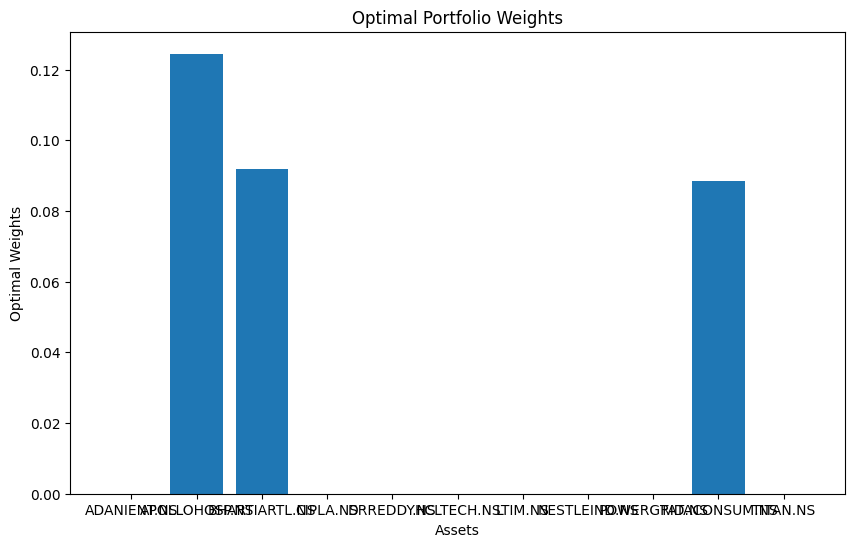

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(company_tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

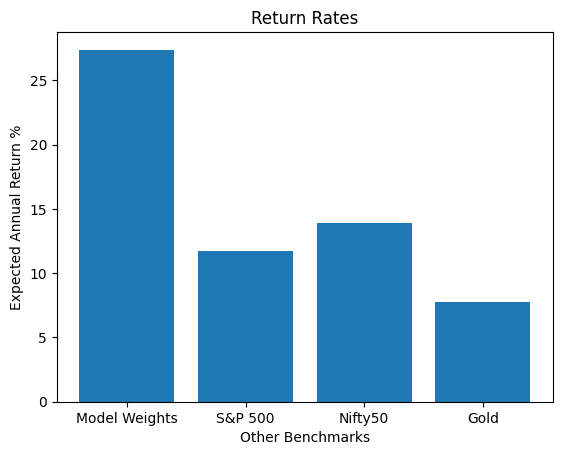

In [87]:
#Comparing annual returns obtained to other asset class
returns=[optimal_portfolio_return*100,11.76,13.9,7.78]
index=['Model Weights','S&P 500','Nifty50','Gold']
plt.bar(index,returns)
plt.title('Return Rates')
plt.xlabel('Other Benchmarks')
plt.ylabel('Expected Annual Return %')

plt.show()